# Part 1: SLR

## Proof of SLR Coefficient Formulas

Consider the model:
$$ y = \alpha + \beta x + \epsilon $$

We want to estimate $\alpha$ and $\beta$ using least squares.

Let $\hat{y}_i = \hat{\alpha} + \hat{\beta} x_i$

The sum of squared errors (SSE):
$$ SSE = \sum_{i=1}^n (y_i - \hat{\alpha} - \hat{\beta} x_i)^2 $$

To find the minimum, take derivatives w.r.t $\hat{\alpha}$ and $\hat{\beta}$ and set to zero:

1. $\frac{\partial SSE}{\partial \hat{\alpha}} = -2 \sum_{i=1}^n (y_i - \hat{\alpha} - \hat{\beta} x_i) = 0$
2. $\frac{\partial SSE}{\partial \hat{\beta}} = -2 \sum_{i=1}^n x_i (y_i - \hat{\alpha} - \hat{\beta} x_i) = 0$

From (1):
$$ \sum y_i = n \hat{\alpha} + \hat{\beta} \sum x_i $$

From (2):
$$ \sum x_i y_i = \hat{\alpha} \sum x_i + \hat{\beta} \sum x_i^2 $$

Solving these two equations yields:

$$ \hat{\beta} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} $$
$$ \hat{\alpha} = \bar{y} - \hat{\beta} \bar{x} $$

where $\bar{x} = \frac{1}{n} \sum x_i$ and $\bar{y} = \frac{1}{n} \sum y_i$.

# Part 2: MLR

### 1. What is $\beta$?
- $\beta$ is a vector of regression coefficients, representing the effect of each independent variable on the dependent variable.

### 2. What is $X$?
- $X$ is the design matrix (size $n \times p$), containing $n$ observations and $p$ predictors (including intercept if added).

### 3. What are the dimensions of $X$ & $\beta$?
- $X$: $n \times p$
- $\beta$: $p \times 1$

### 4. Prove $\hat{\beta} = (X^T X)^{-1} X^T y$
- The least squares estimator minimizes $\sum (y - X\beta)^2$.
- Take derivative w.r.t $\beta$ and set to zero:
$$ -2 X^T(y - X\beta) = 0 $$
$$ X^T y = X^T X \hat{\beta} $$
$$ \hat{\beta} = (X^T X)^{-1} X^T y $$

### 5. Dimensions of each element of $\hat{\beta}$
- Each element of $\hat{\beta}$ is a scalar coefficient (typically real number).

### 6. When is $X^T X$ invertible?
- $X^T X$ is invertible if $X$ has full column rank (columns of $X$ are linearly independent).

# Part 3: Calculate SLR Coefficients

Given dataset:
| $x$ | $y$ |
|---|---|
| 1 | 3 |
| 2 | 5 |
| 3 | 4 |
| 4 | 7 |
| 5 | 6 |

## 1. Calculate intercept and slope
Let $\bar{x} = 3$, $\bar{y} = 5$

$\sum (x_i - \bar{x})(y_i - \bar{y}) = (-2)\times(-2) + (-1)\times0 + 0\times(-1) + 1\times2 + 2\times1 = 4 + 0 + 0 + 2 + 2 = 8$
$\sum (x_i - \bar{x})^2 = (-2)^2 + (-1)^2 + 0^2 + 1^2 + 2^2 = 4 + 1 + 0 + 1 + 4 = 10$

$\hat{\beta} = \frac{8}{10} = 0.8$
$\hat{\alpha} = 5 - 0.8 \times 3 = 2.6$

**Regression line:** $\hat{y} = 2.6 + 0.8x$

## 2. Draw regression line on paper and by code (see below)

## 3. Calculate residuals
| $x$ | $y$ | $\hat{y}$ | residual ($y-\hat{y}$) |
|---|---|---|---|
| 1 | 3 | 3.4 | -0.4 |
| 2 | 5 | 4.2 | 0.8 |
| 3 | 4 | 5.0 | -1.0 |
| 4 | 7 | 5.8 | 1.2 |
| 5 | 6 | 6.6 | -0.6 |

## 4. Calculate SSR
$SSR = (-0.4)^2 + (0.8)^2 + (-1.0)^2 + (1.2)^2 + (-0.6)^2 = 0.16 + 0.64 + 1.00 + 1.44 + 0.36 = 3.60$

## 5. Calculate $R^2$
$SST = \sum (y_i - \bar{y})^2 = (-2)^2 + 0^2 + (-1)^2 + 2^2 + 1^2 = 4 + 0 + 1 + 4 + 1 = 10$
$R^2 = 1 - \frac{SSR}{SST} = 1 - \frac{3.6}{10} = 0.64$

## Now in code:

alpha (intercept): 2.5999999999999996
beta (slope): 0.8
Residuals: [-0.4  0.8 -1.   1.2 -0.6]
SSR: 3.6000000000000005
SST: 10.0
R^2: 0.6399999999999999


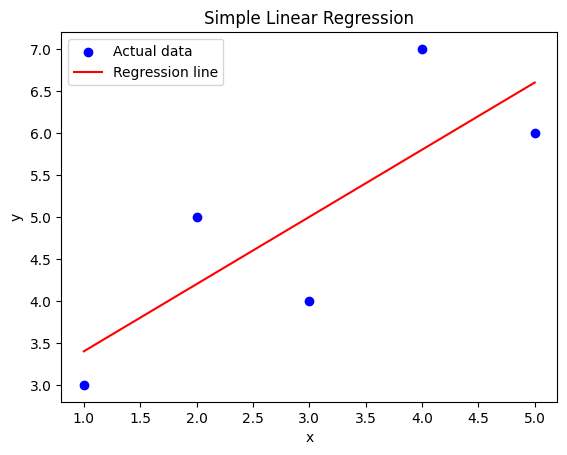

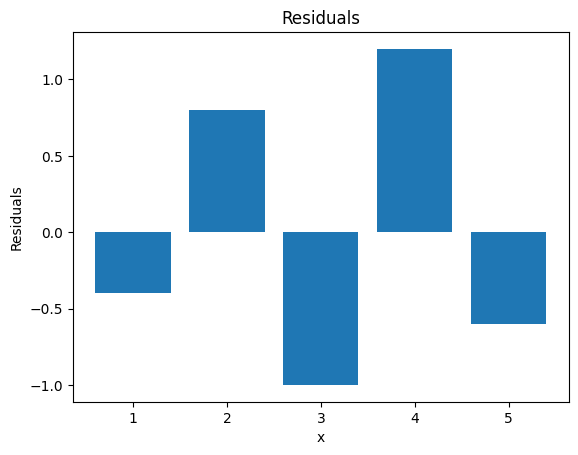

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 4, 7, 6])
n = len(x)

mean_x = np.mean(x)
mean_y = np.mean(y)
beta_hat = np.sum((x - mean_x) * (y - mean_y)) / np.sum((x - mean_x)**2)
alpha_hat = mean_y - beta_hat * mean_x
y_hat = alpha_hat + beta_hat * x
residuals = y - y_hat
SSR = np.sum(residuals**2)
SST = np.sum((y - mean_y)**2)
R2 = 1 - SSR / SST

print(f"alpha (intercept): {alpha_hat}")
print(f"beta (slope): {beta_hat}")
print(f"Residuals: {residuals}")
print(f"SSR: {SSR}")
print(f"SST: {SST}")
print(f"R^2: {R2}")

# Plot
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, y_hat, color='red', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

# Residuals plot
plt.bar(x, residuals)
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residuals')
plt.show()

# Part 4: California Housing Regression

**Goal:** Predict house prices based on median income (and other features).

## Tasks (Step-by-step code below)

MSE: 0.7091157771765548
R^2: 0.45885918903846656


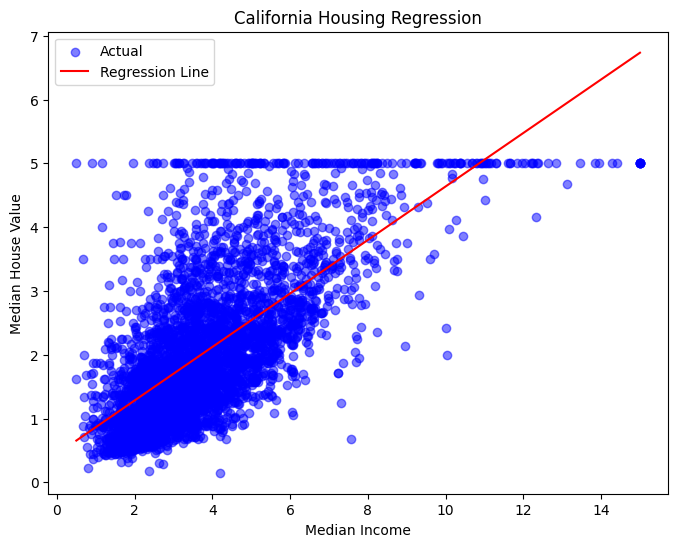

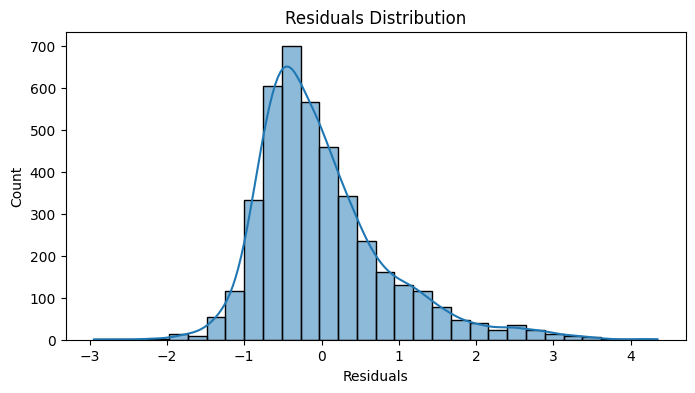

MSE (multi): 0.555891598695244
R^2 (multi): 0.5757877060324511


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 1. Divide dataset
X = df[['MedInc']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Predict on test data
y_pred = model.predict(X_test)

# 4. Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# 5. Plot regression line
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.plot(X_test.sort_values('MedInc'), model.predict(X_test.sort_values('MedInc')), color='red', label='Regression Line')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('California Housing Regression')
plt.legend()
plt.show()

# 6. Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

# 7. Repeat with more features
X_multi = df.drop('target', axis=1) # use all features
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_m = model_multi.predict(X_test_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)
print(f"MSE (multi): {mse_m}")
print(f"R^2 (multi): {r2_m}")